# Link to the dataset
🔗 https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/data

# Import libraries

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe

In [40]:
df = pd.read_csv('ultra_marathon_data.csv')

C:\Users\uzivatel\AppData\Local\Temp\ipykernel_51616\1349798841.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ultra_marathon_data.csv')


# Discover the data, that has been imported 

In [41]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [42]:
df.shape

(7461195, 13)

The dataset contains over 7 million records between 1798 and 2022!

In [43]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [44]:
df_2022 = df[df['Year of event'] == 2022]

<Axes: title={'center': 'No of Events in each country in 2022'}, xlabel='Country', ylabel='Count'>

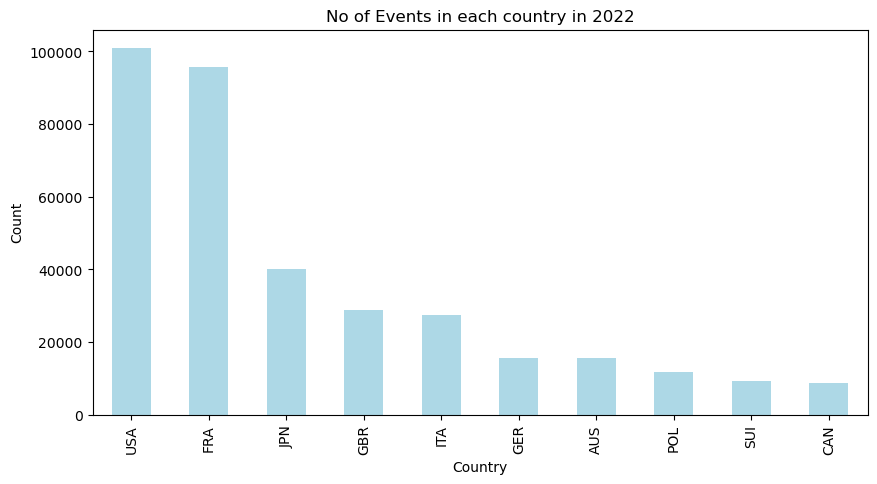

In [45]:
df_2022['Event name'].str.split('(').str.get(1).str.split(')').str.get(0).value_counts().head(10).plot(
    kind='bar',title='No of Events in each country in 2022',ylabel='Count',xlabel='Country',color='lightblue',figsize=(10,5))

The chart above shows the ultramarathon races in 2022 by the countries in which they were held. The USA has the highest representation with just over 100k races, France second with also almost 100k races.

# Clean up data
Only want Races in the Czech Republic or Slovakia in 2022.

In [46]:
df[(df['Event name'].str.contains('CZE|SVK')) & (df['Year of event'] == 2022)].head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
3144592,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,4:09:11 h,Srtg Most,CZE,1983.0,F,W35,12.039,948743
3144593,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,4:17:11 h,MK Kladno,CZE,1984.0,M,M35,11.665,119714
3144594,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,4:19:27 h,Rumning Klap,CZE,1967.0,M,M50,11.563,167471
3144595,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,4:29:10 h,*Chedenice,CZE,1978.0,F,W40,11.146,119731
3144596,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,5:51:08 h,Irico Olomouc,CZE,1952.0,M,M65,8.544,416487


# Assign the filtered data into a new dataframe

In [47]:
df2 = df[(df['Event name'].str.contains('CZE|SVK')) & (df['Year of event'] == 2022)]

In [48]:
df2.shape

(2537, 13)

Now we have 2537 records for the races only in the Czech Republic or Slovakia in 2022.

# Clean up athlete age
Subtract the athlete's year of birth from 2022 and create a new column 'athlete_age'.

In [49]:
df2['athlete_age'] = 2022 - df2['Athlete year of birth']

C:\Users\uzivatel\AppData\Local\Temp\ipykernel_51616\71848663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = 2022 - df2['Athlete year of birth']


# Remove 'h' from Athlete performance column

In [50]:
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

C:\Users\uzivatel\AppData\Local\Temp\ipykernel_51616\2477507555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


# Drop columns: Athlete club, Athlete age category, Athlete year of birth

In [51]:
df2 = df2.drop(['Athlete club', 'Athlete year of birth', 'Athlete age category'], axis=1)

# Clean up null values

In [52]:
df2.isna().sum()

Year of event                 0
Event dates                   0
Event name                    0
Event distance/length         0
Event number of finishers     0
Athlete performance           0
Athlete country               0
Athlete gender                0
Athlete average speed         0
Athlete ID                    0
athlete_age                  13
dtype: int64

In [53]:
df2[df2['athlete_age'].isna()==True].head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,athlete_age
3190776,2022,22.-23.04.2022,Big Bear’s Backyard Ultra (SVK),36h,68,167.650,SVK,M,25,945596,NaN
3190799,2022,22.-23.04.2022,Big Bear’s Backyard Ultra (SVK),36h,68,100.590,SVK,M,15,956948,NaN
3190806,2022,22.-23.04.2022,Big Bear’s Backyard Ultra (SVK),36h,68,87.178,SVK,M,13,956950,NaN
3190807,2022,22.-23.04.2022,Big Bear’s Backyard Ultra (SVK),36h,68,80.472,SVK,F,12,956951,NaN
3190818,2022,22.-23.04.2022,Big Bear’s Backyard Ultra (SVK),36h,68,80.472,SVK,M,12,956953,NaN


In [54]:
df2 = df2.dropna()

Here it was necessary to remove records that did not contain any data (null values) in order to convert 'athlete_age' to integer.

# Check for duplicates

In [55]:
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,athlete_age


We have no duplicate records in the data.

# Reset index

In [56]:
df2.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,4:09:11,CZE,F,12.039,948743,39.0
1,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,4:17:11,CZE,M,11.665,119714,38.0
2,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,4:19:27,CZE,M,11.563,167471,55.0
3,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,4:29:10,CZE,F,11.146,119731,44.0
4,2022,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,5:51:08,CZE,M,8.544,416487,70.0
...,...,...,...,...,...,...,...,...,...,...,...
2519,2022,22.10.2022,Slapy Trail Maniacs (CZE),61km,74,10:31:22,CZE,M,5.797,310562,49.0
2520,2022,22.10.2022,Slapy Trail Maniacs (CZE),61km,74,11:00:06,CZE,M,5.545,777810,38.0
2521,2022,22.10.2022,Slapy Trail Maniacs (CZE),61km,74,11:00:06,CZE,M,5.545,777811,35.0
2522,2022,22.10.2022,Slapy Trail Maniacs (CZE),61km,74,11:29:06,CZE,M,5.311,1043284,34.0


# Fix data types

In [57]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete country               object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [58]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [59]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [60]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete country               object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int32
dtype: object

Convert 'athlete_age' to integer and 'Athlete average speed' to float.

# Rename columns
Remove spaces and in lowercase, because it's clearer and much easier to work with in the future.

In [61]:
df2 = df2.rename(columns={'Year of event': 'year',
                          'Event dates' : 'race_day',
                          'Event name' : 'race',
                          'Event distance/length' : 'race_length',
                          'Event number of finishers' : 'race_no_of_finishers',
                          'Athlete performance' : 'athlete_performance',
                          'Athlete country' : 'athlete_country',
                          'Athlete gender' : 'athlete_gender',
                          'Athlete average speed' : 'athlete_avg_speed',
                          'Athlete ID' : 'athlete_id'
                          })

In [62]:
df3 = df2[['race_day', 'race', 'race_length', 'race_no_of_finishers', 
           'athlete_id', 'athlete_performance','athlete_avg_speed',
           'athlete_gender', 'athlete_age', 'athlete_country'
           ]]

I also rearranged the columns to make it make more sense and removed the 'year' column because the dataset now only covers races in 2022, so it was redundant.

In [63]:
df3.head(1)

,race_day,race,race_length,race_no_of_finishers,athlete_id,athlete_performance,athlete_avg_speed,athlete_gender,athlete_age,athlete_country
3144592,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,948743,4:09:11,12.039,F,39,CZE


# Graphs and charts

c:\Users\uzivatel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race_length', ylabel='Count'>

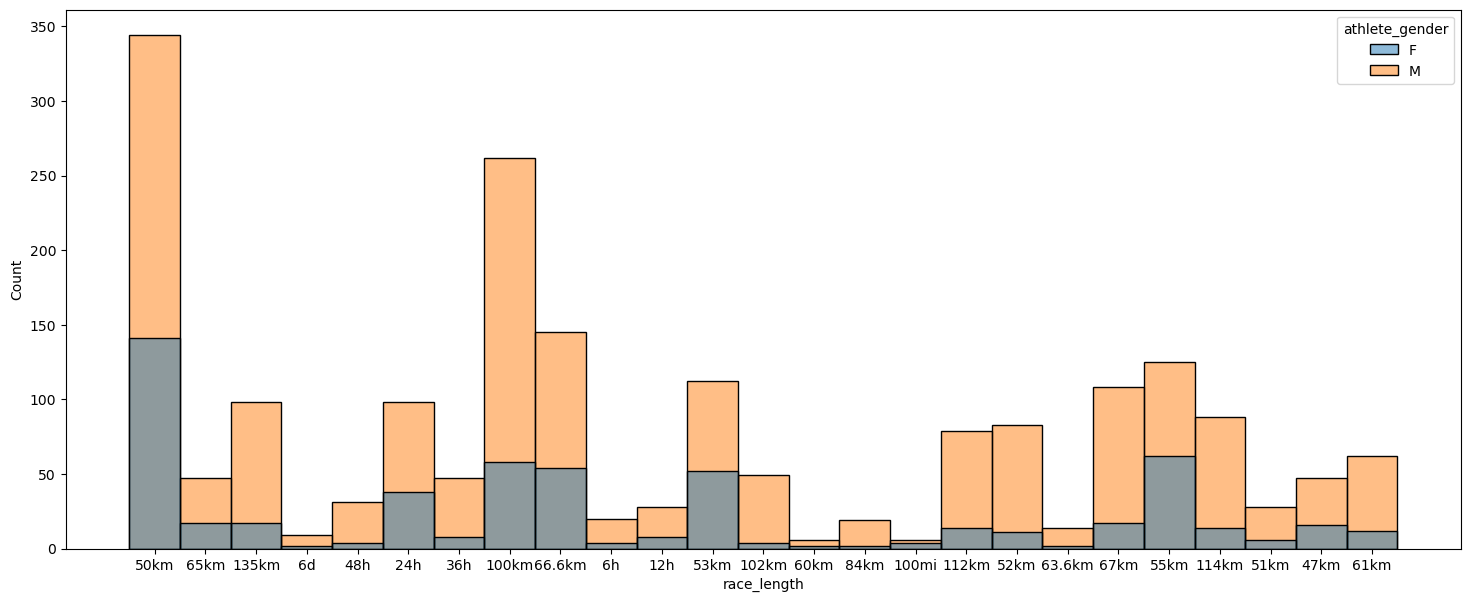

In [64]:
plt.figure(figsize=(18, 7))
sns.histplot(df3, x='race_length', hue='athlete_gender')

As we can see, in the shortest ultramarton races (50 km) the distribution between women and men is very even. For longer races (e.g. 100 km or even more) there is a much higher representation of male athletes. 

c:\Users\uzivatel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\uzivatel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


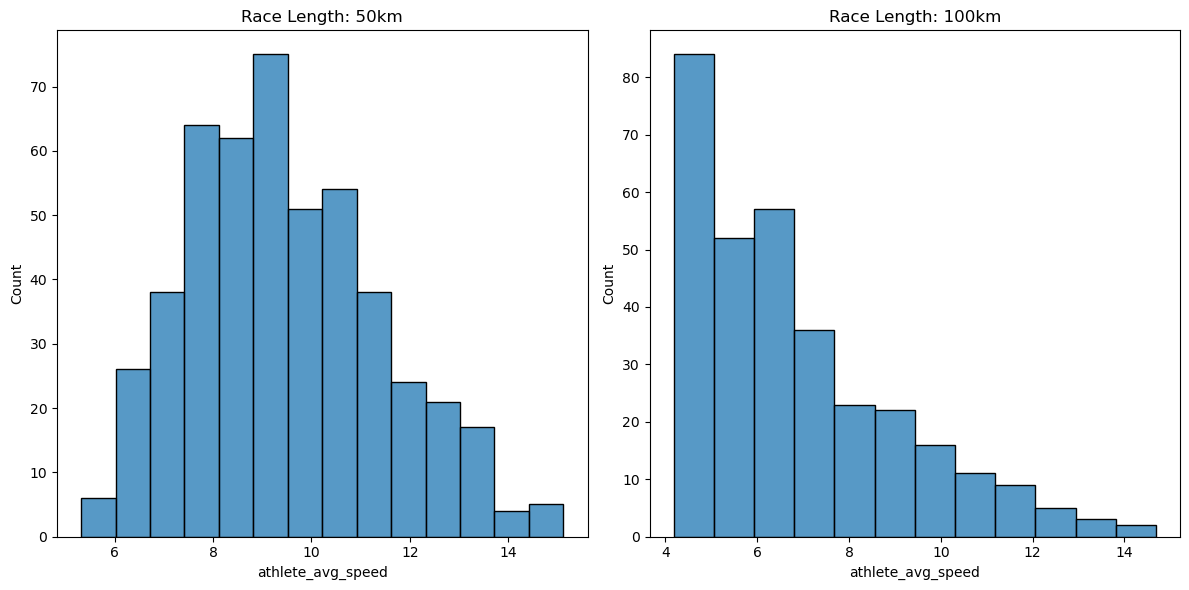

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df3[df3['race_length'] == '50km']['athlete_avg_speed'], ax=axs[0])
axs[0].set_title('Race Length: 50km')
sns.histplot(df3[df3['race_length'] == '100km']['athlete_avg_speed'], ax=axs[1])
axs[1].set_title('Race Length: 100km')
plt.tight_layout()

In 2022, the two most common types of ultramarathon races in the Czech Republic and Slovakia were 50 km and 100 km. In the distibution chart we can see the average speed in 50 km and 100 km races. Athletes most often ran the 50 km race with almost twice the average speed. 

<Axes: xlabel='race_length', ylabel='athlete_avg_speed'>

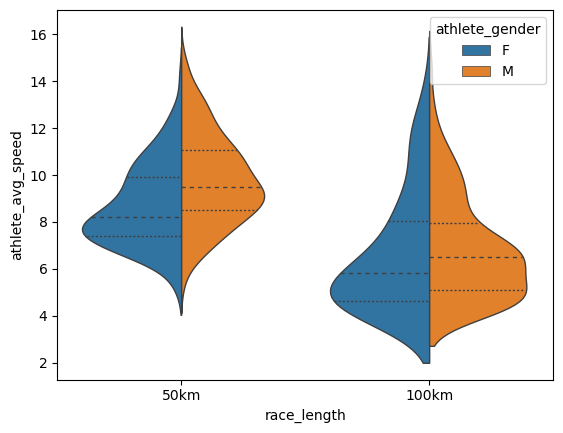

In [66]:
df_filtered = df3[df3['race_length'].isin(['50km', '100km'])]
sns.violinplot(data=df_filtered, x='race_length', y='athlete_avg_speed', 
               hue='athlete_gender', split=True, inner='quart', linewidth=1)

From this graph we can see that men are faster especially in the shorter 50 km race. However, for the 100 km race, the average speeds for female and male athletes are much more equal, where women are often able to run similar or better times than men.

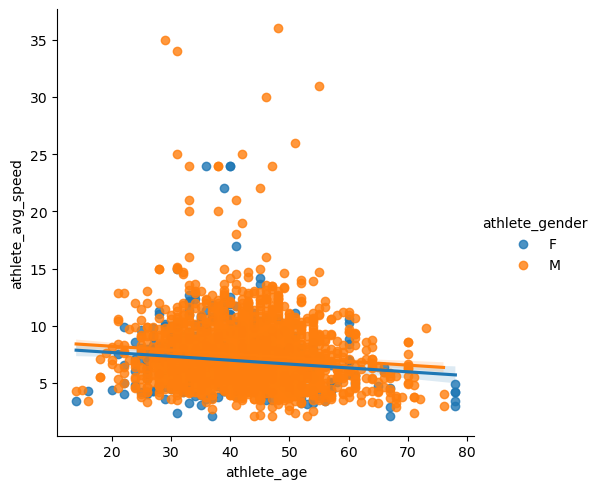

In [67]:
sns.lmplot(df3, x='athlete_age', y='athlete_avg_speed', hue='athlete_gender')

Above we can see a linear graph between the age of the athlete and the average speed of the athlete in all types of races. Of course, the average speed decreases with age for both women and men.

# Questions I want to find out from the data

### 1. Difference in speed for the 50 km, 100 km, male to female

In [68]:
df_filtered.groupby(['athlete_gender', 'race_length'])['athlete_avg_speed'].mean()

athlete_gender  race_length
F               100km          6.611517
                50km           8.659645
M               100km          6.847927
                50km           9.812052
Name: athlete_avg_speed, dtype: float64

The results show that for very long distances such as 100 km, women and men have very equal times, with men having only a bit higher average speed. However, for the 50 km race, men dominate and the difference in average speed is slightly more noticeable. 

### 2. What age groups are the best in the 100 km race (10 + races)

In [69]:
df_filtered.query('race_length == "100km"').groupby(
    'athlete_age')['athlete_avg_speed'].agg(
        ['mean', 'count']).sort_values(by='mean', ascending=False).query('count>9')

,mean,count
athlete_age,,
47,8.192417,12
45,7.905063,16
38,7.436533,15
49,7.433154,13
42,7.207765,17
41,7.176000,12
39,7.045385,13
46,6.825100,20
34,6.785250,12


From the results we can see that the most successful competitors over the longest distances are around 40 years old. For very long distances, experience and strategy play a key role. 

### 3. Are athletes slower in summer than winter?

Spring 3-5

Summer 6-8

Fall 9-11

Winter 12-2

In [70]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

In [71]:
df3['race_season'] = df3['race_month'].apply(
    lambda x: 'Winter' if x > 11 else 'Fall' 
    if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')

In [72]:
df3.head()

,race_day,race,race_length,race_no_of_finishers,athlete_id,athlete_performance,athlete_avg_speed,athlete_gender,athlete_age,athlete_country,race_month,race_season
3144592,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,948743,4:09:11,12.039,F,39,CZE,3,Spring
3144593,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,119714,4:17:11,11.665,M,38,CZE,3,Spring
3144594,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,167471,4:19:27,11.563,M,55,CZE,3,Spring
3144595,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,119731,4:29:10,11.146,F,44,CZE,3,Spring
3144596,05.03.2022,Běhu na 50 Km Pilsen (CZE),50km,5,416487,5:51:08,8.544,M,70,CZE,3,Spring


In [73]:
df3.groupby('race_season')['athlete_avg_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
race_season,,
Summer,8.461656,886
Spring,7.610544,281
Fall,6.557080,697
Winter,6.553633,660


In general, athletes have better times in marathons and longer races in colder temperatures. The study can be viewed via this link: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0037407#pone-0037407-g004

Interestingly, in this case, the athletes had the best times at the higher temperatures, especially in the summer and spring, and the worst times in the winter. The athletes had almost the same times on average in fall. This could probably be due to the fact that the summers in the Czech Republic and Slovakia are not as hot as in some states in the USA. Races like the Desert Rats 150 in Utah, which are run in the summer in the middle of the desert, would most likely have worse times on average than an equally long race in the winter.

In [74]:
df3.query('race_length == "50km"').groupby('race_season')['athlete_avg_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
race_season,,
Spring,11.897467,30
Fall,11.791400,10
Summer,9.261838,445


In [75]:
df3.query('race_length == "100km"').groupby('race_season')['athlete_avg_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
race_season,,
Spring,10.710176,34
Winter,8.770727,22
Fall,6.138345,264


In the first table we can see the average speeds for the 50 km races. In the second table we can see the average speeds for 100 km races. At the same time, no 50 km races were run in the winter months, i.e. from December to February, and the vast majority were run in the summer months. The 100 km races were run over the winter months, but there were the fewest races. Most races were in the fall months, from September to November. However, for both the 50 and 80 km races, the athletes had their best times in the spring months, i.e. March to May, and there was not as noticeable a difference in average speeds. What is interesting, however, is the huge differences in average speed in the fall for the 50 km and 100 km races. It should be said, however, that there were only 10 50 km races in the fall of 2022, which may skew the results. 